##분산분석

 - 독립변수가 카테고리형 변수인 정규선형 모델(송사리, 잉어..)
 - 일원배치 분산분석: 3개 이상 집단으로 구성된 1개 독립변수
 - 평균값의 차이 검정(t검정은 검정의 다중성 발생, F비로 계산)

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%precision 3
%matplotlib inline

In [4]:
weather=["cloudy","cloudy","rainy","rainy","sunny","sunny"]
beer=[6,8,2,4,10,12]

weather_beer=pd.DataFrame({
    "beer":beer,
    "weather":weather
})
print(weather_beer)

   beer weather
0     6  cloudy
1     8  cloudy
2     2   rainy
3     4   rainy
4    10   sunny
5    12   sunny


<Axes: xlabel='weather', ylabel='beer'>

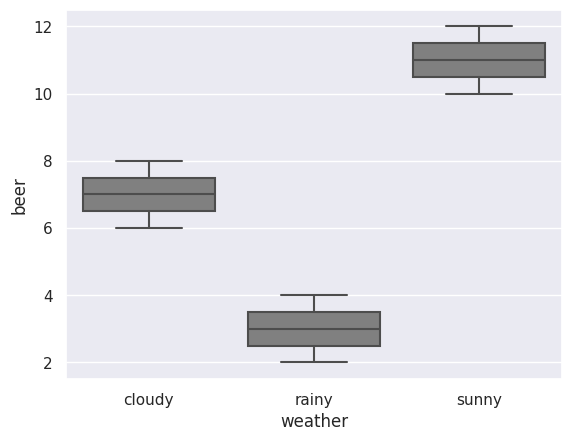

In [5]:
sns.boxplot(x="weather", y="beer", data=weather_beer, color="gray")

In [6]:
print(weather_beer.groupby("weather").mean())

         beer
weather      
cloudy    7.0
rainy     3.0
sunny    11.0


군간 제곱과 군내 제곱 계산

In [7]:
effect=[7,7,3,3,11,11] #날씨에 의한 영향

#군간 제곱합
mu_effect=sp.mean(effect)
squares_model=sp.sum((effect-mu_effect)**2)
squares_model
#분산 계산법: 각 데이터에서 평균 빼고 제곱한 걸 모두 더해서 데이터 수로 나눈 것

64.0

In [8]:
resid=weather_beer.beer-effect
resid

0   -1
1    1
2   -1
3    1
4   -1
5    1
Name: beer, dtype: int64

In [9]:
#군내 제곱합
squares_resid=sp.sum(resid**2)
squares_resid

6

군간 분산과 군내 분산 계산

In [10]:
df_model=2 #군간변동의 자유도 (3-1)
df_resid=3 #군내변동의 자유도 (샘플사이즈 - 수준 종류 수)

In [11]:
variance_model=squares_model/df_model
variance_model

32.0

In [12]:
variance_resid=squares_resid/df_resid
variance_resid

2.0

F비: 군간 분산 / 군내 분산

P값: F분포의 누적분포함수에서 계산

In [13]:
f_ratio=variance_model/variance_resid
f_ratio

16.0

In [14]:
1-sp.stats.f.cdf(x=f_ratio, dfn=df_model, dfd=df_resid)

0.02509457330439091

독립변수가 카테고리형인 일반선형모델

statsmodels를 이용한 분산분석

In [15]:
anova_model=smf.ols("beer~weather", data=weather_beer).fit()

In [16]:
#분산분석표
print(sm.stats.anova_lm(anova_model, typ=2))

          sum_sq   df     F    PR(>F)
weather     64.0  2.0  16.0  0.025095
Residual     6.0  3.0   NaN       NaN


군간과 군내의 편차제곱합 / 자유도 / F비 / P값

모델의 계수 해석

In [17]:
anova_model.params

Intercept           7.0
weather[T.rainy]   -4.0
weather[T.sunny]    4.0
dtype: float64

흐린 날 매상 평균: 7 / 비오는 날: 3(7-4) / 맑은 날: 11(7+4)

오차와 효과 분리하기

In [18]:
fitted=anova_model.fittedvalues
fitted

0     7.0
1     7.0
2     3.0
3     3.0
4    11.0
5    11.0
dtype: float64

In [19]:
anova_model.resid

0   -1.0
1    1.0
2   -1.0
3    1.0
4   -1.0
5    1.0
dtype: float64

나머진 같으므로 생략

회귀모델의 분산분석 (독립변수가 연속형일때 분산분석)

In [20]:
beer=pd.read_csv("5-1-1-beer.csv")
lm_model=smf.ols(formula="beer~temperature", data=beer).fit()

In [23]:
print(sm.stats.anova_lm(lm_model, typ=2))

                  sum_sq    df          F    PR(>F)
temperature  1651.532489   1.0  28.446984  0.000011
Residual     1625.582178  28.0        NaN       NaN


In [25]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           1.11e-05
Time:                        05:30:43   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

독립변수가 1개인 경우에는 t검정과 분산분석 결과 일치